In [241]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
from datetime import datetime
from sklearn import metrics

In [188]:
import datetime
import numpy as np
epoch_0 = datetime.datetime(1970,1,1,0,0,0)

def convertDate(date):
    return (pd.Timestamp(date) - epoch_0) / (np.timedelta64(1,'s'))

K_LIST = [2, 5, 12, 24, 48]
SYMBOLS_LIST = ['BTC.X', 'BCH.X', 'LTC.X', 'ETH.X']

In [189]:
twoHdata = pd.read_csv("output/2h.csv") 
fiveH_data = pd.read_csv("output/5h.csv") 
twelveH_data = pd.read_csv("output/12h.csv") 
twoFourH_data = pd.read_csv("output/24h.csv") 
fourEight_data = pd.read_csv("output/48h.csv") 

hour_df_list = [twoHdata, fiveH_data, twelveH_data, twoFourH_data, fourEight_data]
hour_symbol_df_list = []

for k_index in range(len(K_LIST)):
    df = hour_df_list[k_index]
    df['created_at'] = df['created_at'].apply(convertDate)
    df['modified'] = df['modified'].apply(convertDate)
    df['Date'] = df['Date'].apply(convertDate)
    df = df.sort_values(by=['created_at'])
    df = df.fillna(method='ffill')
    df = df.fillna(0)
    hour_symbol_list = []
    for symbol_index in range(len(SYMBOLS_LIST)):
        df_symbol = df[df.Symbol == symbol_index].reset_index()
        hour_symbol_list.append(df_symbol)
    
    hour_symbol_df_list.append(hour_symbol_list)

### See correlation of vars quickly

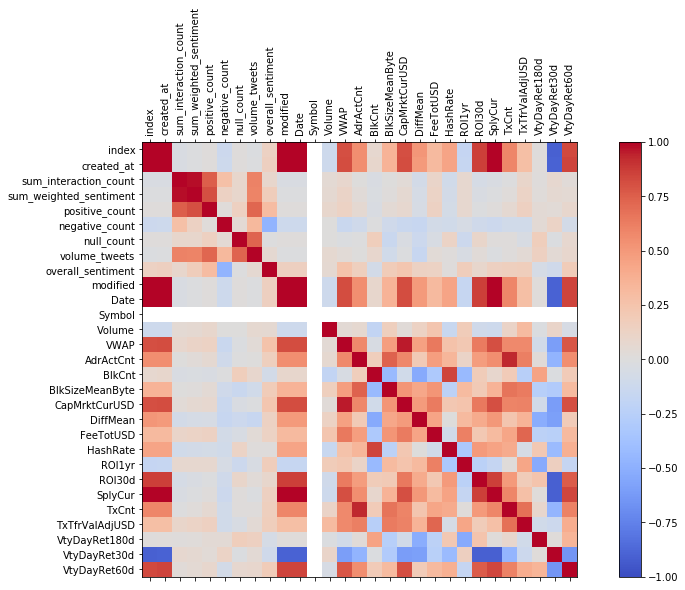

In [190]:
data = hour_symbol_df_list[0][0]
corr = data.corr()
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [191]:
from sklearn.model_selection import train_test_split

X_train_hour_symbol = []
y_train_hour_symbol = []
X_test_hour_symbol = []
y_test_hour_symbol = []

for k_index in range(len(K_LIST)):
    X_train_hour_symbol_list = []
    y_train_hour_symbol_list = []
    X_test_hour_symbol_list = []
    y_test_hour_symbol_list = []
    
    for symbol_index in range(len(SYMBOLS_LIST)):
        df = hour_symbol_df_list[k_index][symbol_index]
        X = df.drop('VWAP', axis = 1)
        y = df[['VWAP']]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
        
        X_train_hour_symbol_list.append(X_train)
        y_train_hour_symbol_list.append(y_train)
        X_test_hour_symbol_list.append(X_test)
        y_test_hour_symbol_list.append(y_test)
    
    X_train_hour_symbol.append(X_train_hour_symbol_list)
    y_train_hour_symbol.append(y_train_hour_symbol_list)
    X_test_hour_symbol.append(X_test_hour_symbol_list)
    y_test_hour_symbol.append(y_test_hour_symbol_list)

In [253]:
X_train_hour_symbol[0][0]

,index,created_at,sum_interaction_count,sum_weighted_sentiment,positive_count,negative_count,null_count,volume_tweets,overall_sentiment,modified,...,FeeTotUSD,HashRate,ROI1yr,ROI30d,SplyCur,TxCnt,TxTfrValAdjUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,0,1.584205e+09,0,0,0,0,2,2,0.0,1.584212e+09,...,274683.518594,1.053248e+08,31.862779,-49.732071,1.827070e+07,276029,1.851754e+09,0.047852,0.094492,0.069323
1,2,1.584522e+09,0,0,0,0,1,1,0.0,1.584529e+09,...,326605.559055,8.228503e+07,34.941473,-44.310198,1.827647e+07,233212,1.962304e+09,0.048563,0.096938,0.070792
2,1,1.584536e+09,0,0,0,0,1,1,0.0,1.584544e+09,...,326605.559055,8.228503e+07,34.941473,-44.310198,1.827647e+07,233212,1.962304e+09,0.048563,0.096938,0.070792
3,6,1.584576e+09,3,6,1,0,0,1,2.0,1.584583e+09,...,426969.343001,8.804498e+07,53.909258,-39.152852,1.827780e+07,265543,2.221131e+09,0.049716,0.100462,0.073290
4,4,1.584580e+09,0,0,0,0,1,1,2.0,1.584587e+09,...,426969.343001,8.804498e+07,53.909258,-39.152852,1.827780e+07,265543,2.221131e+09,0.049716,0.100462,0.073290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,698,1.587668e+09,19,38,5,0,0,5,2.0,1.587676e+09,...,308738.316591,1.126499e+08,37.862242,10.531978,1.834185e+07,327396,2.076804e+09,0.049507,0.036763,0.077182
702,703,1.587672e+09,203,406,32,0,0,32,2.0,1.587679e+09,...,308738.316591,1.126499e+08,37.862242,10.531978,1.834185e+07,327396,2.076804e+09,0.049507,0.036763,0.077182
703,695,1.587676e+09,61,122,17,0,8,25,2.0,1.587683e+09,...,308738.316591,1.126499e+08,37.862242,10.531978,1.834185e+07,327396,2.076804e+09,0.049507,0.036763,0.077182
704,723,1.587679e+09,14,28,2,0,9,11,2.0,1.587686e+09,...,272072.421594,1.142365e+08,46.390830,12.204456,1.834365e+07,317682,2.387848e+09,0.049442,0.036640,0.077097


## 1. Linear regression

In [192]:
from sklearn.linear_model import LinearRegression

reg_model_hour_symbol = []

for k_index in range(len(K_LIST)):
    reg_model_hour_symbol_list = []
    for symbol_index in range(len(SYMBOLS_LIST)):
        regression_model = LinearRegression()
        regression_model.fit(X_train_hour_symbol[k_index][symbol_index], y_train_hour_symbol[k_index][symbol_index])
        regression_model.score(X_test_hour_symbol[k_index][symbol_index], y_test_hour_symbol[k_index][symbol_index])
        reg_model_hour_symbol_list.append(regression_model)
        
    reg_model_hour_symbol.append(reg_model_hour_symbol_list)

In [218]:
from sklearn.metrics import mean_squared_error
import math

total_r_squared = []
total_r_squared_sum = 0

for k_index in range(len(K_LIST)):
    for symbol_index in range(len(SYMBOLS_LIST)):
        regression_model = reg_model_hour_symbol[k_index][symbol_index]
        X_test = X_test_hour_symbol[k_index][symbol_index]
        X_train = X_train_hour_symbol[k_index][symbol_index]
        y_test = y_test_hour_symbol[k_index][symbol_index]
        y_train = y_train_hour_symbol[k_index][symbol_index]
        
        rSquared = regression_model.score(X_test, y_test)
        y_predict = regression_model.predict(X_test)
        regression_model_mse = mean_squared_error(y_predict, y_test)
        RMSE = math.sqrt(regression_model_mse)
        total_r_squared.append(rSquared)
        total_r_squared_sum = total_r_squared_sum + rSquared
        # plot
#         plt.figure(figsize=(4,4))
#         plt.plot(y_predict, label="y_predicted")
#         plt.plot(y_test.reset_index()['VWAP'], label="y_test")
#         plt.legend(loc="upper left")
#         plt.title("R2 for " + str(K_LIST[k_index]) + " h-" + SYMBOLS_LIST[symbol_index] + ": " + str(rSquared))
#         plt.suptitle("RMSE for" + str(K_LIST[k_index]) + " h-" + SYMBOLS_LIST[symbol_index] + ": " + str(RMSE))
#         plt.savefig("figs/reg/" + str(K_LIST[k_index]) + "h-" +  SYMBOLS_LIST[symbol_index] + '.png')
#         plt.show()
        print("R2 for", K_LIST[k_index], "h-", SYMBOLS_LIST[symbol_index], ":", rSquared)
        print("RMSE for", K_LIST[k_index], "h-", SYMBOLS_LIST[symbol_index], ":", RMSE, "\n")

print(total_r_squared_sum)
print((total_r_squared_sum)/20)
print(np.var(total_r_squared))

R2 for 2 h- BTC.X : 0.7216546518245078
RMSE for 2 h- BTC.X : 291.9372862085501 

R2 for 2 h- BCH.X : -26.415966568271052
RMSE for 2 h- BCH.X : 30.47669357580211 

R2 for 2 h- LTC.X : -1.2649615184973815
RMSE for 2 h- LTC.X : 2.749572408797008 

R2 for 2 h- ETH.X : -1.3064795543422139
RMSE for 2 h- ETH.X : 14.492454302788701 

R2 for 5 h- BTC.X : 0.7414170885346608
RMSE for 5 h- BTC.X : 278.92335441539956 

R2 for 5 h- BCH.X : -21.017201428583373
RMSE for 5 h- BCH.X : 28.537428536535867 

R2 for 5 h- LTC.X : -1.9061697114876819
RMSE for 5 h- LTC.X : 3.0734561578583577 

R2 for 5 h- ETH.X : -1.5948186689748547
RMSE for 5 h- ETH.X : 15.310112177021908 

R2 for 12 h- BTC.X : 0.7974224690254162
RMSE for 12 h- BTC.X : 247.22815047395446 

R2 for 12 h- BCH.X : -19.934937702869057
RMSE for 12 h- BCH.X : 30.35788654372992 

R2 for 12 h- LTC.X : -1.6125092978816218
RMSE for 12 h- LTC.X : 2.818972799554142 

R2 for 12 h- ETH.X : -1.4657496239696999
RMSE for 12 h- ETH.X : 14.401111912647403 

R2 f

### 2. Decision Tree regression

In [199]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_model_hour_symbol = []

for k_index in range(len(K_LIST)):
    dec_tree_model_list = []
    for symbol_index in range(len(SYMBOLS_LIST)):
        dec_tree_model = DecisionTreeRegressor()
        dec_tree_model.fit(X_train_hour_symbol[k_index][symbol_index], y_train_hour_symbol[k_index][symbol_index])
        dec_tree_model_list.append(dec_tree_model)
        
    dec_tree_model_hour_symbol.append(dec_tree_model_list)

In [217]:
from sklearn.metrics import mean_squared_error
import math

total_r_squared = []
total_r_squared_sum = 0
for k_index in range(len(K_LIST)):
    for symbol_index in range(len(SYMBOLS_LIST)):
        dec_tree_model = dec_tree_model_hour_symbol[k_index][symbol_index]
        X_test = X_test_hour_symbol[k_index][symbol_index]
        X_train = X_train_hour_symbol[k_index][symbol_index]
        y_test = y_test_hour_symbol[k_index][symbol_index]
        y_train = y_train_hour_symbol[k_index][symbol_index]
        
        rSquared = dec_tree_model.score(X_test, y_test)
        y_predict = dec_tree_model.predict(X_test)
        regression_model_mse = mean_squared_error(y_predict, y_test)
        RMSE = math.sqrt(regression_model_mse)
        
        total_r_squared.append(rSquared)
        total_r_squared_sum = total_r_squared_sum + rSquared
        # plot
#         plt.figure(figsize=(4,4))
#         plt.plot(y_predict, label="y_predicted")
#         plt.plot(y_test.reset_index()['VWAP'], label="y_test")
#         plt.legend(loc="upper left")
#         plt.title("R2 for " + str(K_LIST[k_index]) + " h-" + SYMBOLS_LIST[symbol_index] + ": " + str(rSquared))
#         plt.suptitle("RMSE for" + str(K_LIST[k_index]) + " h-" + SYMBOLS_LIST[symbol_index] + ": " + str(RMSE))
#         plt.savefig("figs/dec_tree/" + str(K_LIST[k_index]) + "h-" +  SYMBOLS_LIST[symbol_index] + '.png')
#         plt.show()
        print("R2 for", K_LIST[k_index], "h-", SYMBOLS_LIST[symbol_index], ":", rSquared)
        print("RMSE for", K_LIST[k_index], "h-", SYMBOLS_LIST[symbol_index], ":", RMSE, "\n")
        

print(np.var(total_r_squared))

R2 for 2 h- BTC.X : -0.6859210160215085
RMSE for 2 h- BTC.X : 718.4825007866867 

R2 for 2 h- BCH.X : -0.1998368643216133
RMSE for 2 h- BCH.X : 6.3756896427800385 

R2 for 2 h- LTC.X : -1.962733139635592
RMSE for 2 h- LTC.X : 3.1447129918679755 

R2 for 2 h- ETH.X : -9.17014137352986
RMSE for 2 h- ETH.X : 30.432009445939485 

R2 for 5 h- BTC.X : -0.7231366696204106
RMSE for 5 h- BTC.X : 720.0204498526072 

R2 for 5 h- BCH.X : -1.5649290738591164
RMSE for 5 h- BCH.X : 9.7402803980157 

R2 for 5 h- LTC.X : -0.592698218899383
RMSE for 5 h- LTC.X : 2.2752717965588443 

R2 for 5 h- ETH.X : -9.225534244104953
RMSE for 5 h- ETH.X : 30.392601066716576 

R2 for 12 h- BTC.X : -1.6053619198371551
RMSE for 12 h- BTC.X : 886.61752969012 

R2 for 12 h- BCH.X : -5.5498007795354045
RMSE for 12 h- BCH.X : 16.980471389974195 

R2 for 12 h- LTC.X : -0.8196656055188907
RMSE for 12 h- LTC.X : 2.3526523480930304 

R2 for 12 h- ETH.X : -10.900591835114168
RMSE for 12 h- ETH.X : 31.637766584155077 

R2 for 24

### 3. Gradient Boosted Tree regression

In [273]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics   #Additional scklearn functions
from sklearn import preprocessing
from sklearn import utils

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=2):
    lab_enc = preprocessing.LabelEncoder()
    encoded = lab_enc.fit_transform(dtrain['VWAP'])
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], encoded)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors],encoded, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(encoded.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(encoded, dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

### Baseline

In [271]:
train_pd_list = []
#Choose all predictors
for k_index in range(len(K_LIST)):
    for symbol_index in range(len(SYMBOLS_LIST)):
        train_pd = hour_symbol_df_list[k_index][symbol_index]
        predictors = [x for x in hour_symbol_df_list[k_index][symbol_index].columns if x not in ['VWAP']]
        gbm0 = GradientBoostingClassifier(random_state=10)
        modelfit(gbm0, train_pd, predictors)

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

### Tuning for n_estimators

In [279]:
#Choose all predictors 
for k_index in range(len(K_LIST)):
    for symbol_index in range(len(SYMBOLS_LIST)):
        train = hour_symbol_df_list[k_index][symbol_index]
        predictors = [x for x in train.columns if x not in ['VWAP']]
        param_test1 = {'n_estimators':range(20,81,10)}
        gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=10,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
        lab_enc = preprocessing.LabelEncoder()
        encoded = lab_enc.fit_transform(train['VWAP'])
        gsearch1.fit(train[predictors], encoded)
        print(gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_)

ValueError: n_splits=5 cannot be greater than the number of members in each class.

### Tuning tree-specific parameters

#### max_depth and num_samples_split

In [ ]:
#Choose all predictors 
for k_index in range(len(K_LIST)):
    for symbol_index in range(len(SYMBOLS_LIST)):
        train = hour_symbol_df_list[k_index][symbol_index]
        param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
        gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
        param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
        gsearch2.fit(train[predictors],train[target])
        gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_
        print(gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_)

#### min_samples_leaf

In [ ]:
for k_index in range(len(K_LIST)):
    for symbol_index in range(len(SYMBOLS_LIST)):
        train = hour_symbol_df_list[k_index][symbol_index]
        param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
        gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
        param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
        gsearch3.fit(train[predictors],train[target])
        print(gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_)

### Previously:

In [244]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 10, 'max_depth': 4, 'subsample': 0.9,
          'learning_rate': 0.01, 'loss': 'ls'}

gb_tree_model_hour_symbol = []

for k_index in range(len(K_LIST)):
    gb_tree_model_list = []
    for symbol_index in range(len(SYMBOLS_LIST)):
        gb_tree_model = GradientBoostingRegressor(**params)
        gb_tree_model.fit(X_train_hour_symbol[k_index][symbol_index], y_train_hour_symbol[k_index][symbol_index].values.ravel())
        gb_tree_model_list.append(gb_tree_model)
        
    gb_tree_model_hour_symbol.append(gb_tree_model_list)

rsquared for train is -309.09216252005234


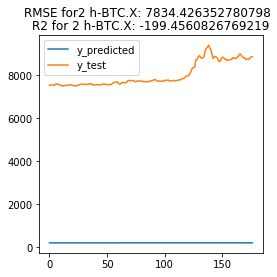

rsquared for train is -20.161623329339417


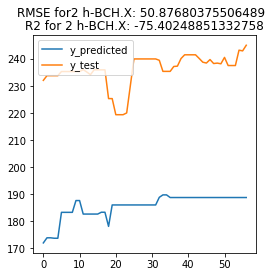

rsquared for train is -2410.448770967963


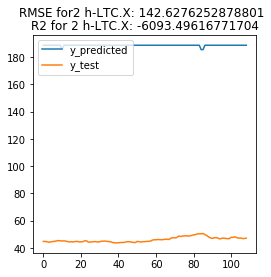

rsquared for train is 0.9275622439015113


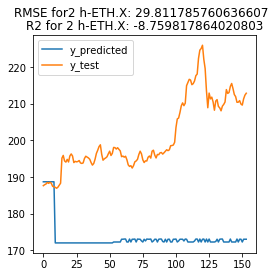

rsquared for train is -315.5555027878055


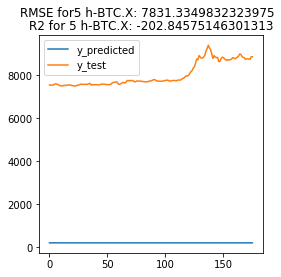

rsquared for train is -20.26247994629559


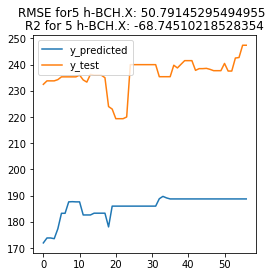

rsquared for train is -2397.644010906161


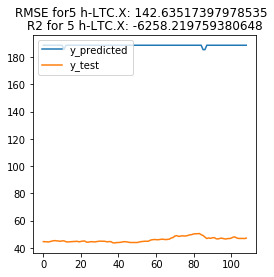

rsquared for train is 0.9280483346110907


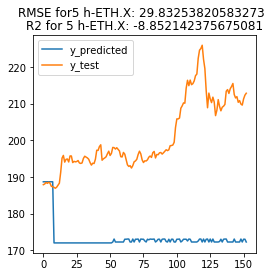

rsquared for train is -333.89689643659165


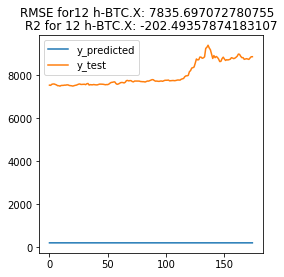

rsquared for train is -24.373802003709265


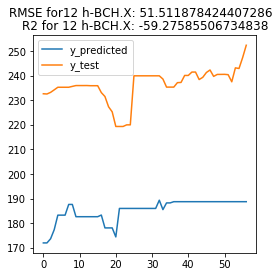

rsquared for train is -2439.032870993135


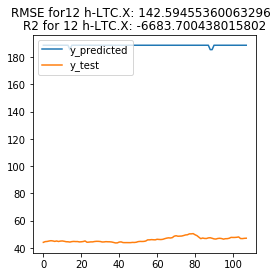

rsquared for train is 0.9357684803731854


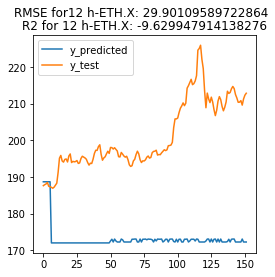

rsquared for train is -364.3421441842032


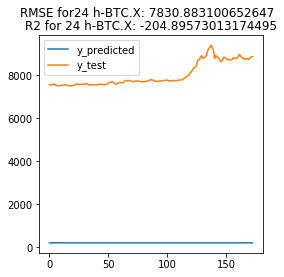

rsquared for train is -24.69734790726415


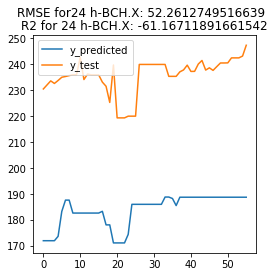

rsquared for train is -2408.6612355672987


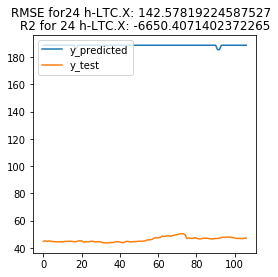

rsquared for train is 0.9538865041430327


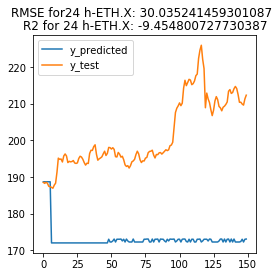

rsquared for train is -369.42728116230245


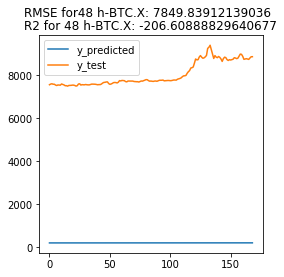

rsquared for train is -27.59089023571413


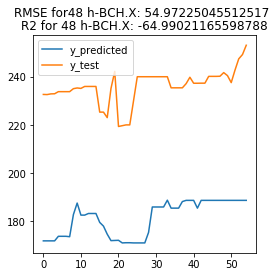

rsquared for train is -2432.181957189012


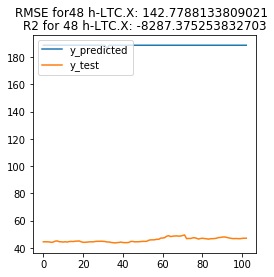

rsquared for train is 1.0


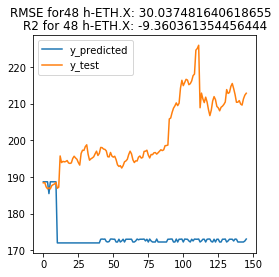

In [245]:
from sklearn.metrics import mean_squared_error
import math

for k_index in range(len(K_LIST)):
    for symbol_index in range(len(SYMBOLS_LIST)):
        gb_tree_model = gb_tree_model_hour_symbol[k_index][symbol_index]
        X_test = X_test_hour_symbol[k_index][symbol_index]
        X_train = X_train_hour_symbol[k_index][symbol_index]
        y_test = y_test_hour_symbol[k_index][symbol_index]
        y_train = y_train_hour_symbol[k_index][symbol_index]
        
        rSquaredTrain = dec_tree_model.score(X_train, y_train)
        print("rsquared for train is", rSquaredTrain)
        rSquared = dec_tree_model.score(X_test, y_test)
        y_predict = dec_tree_model.predict(X_test)
        regression_model_mse = mean_squared_error(y_predict, y_test)
        RMSE = math.sqrt(regression_model_mse)
        
        # plot
        plt.figure(figsize=(4,4))
        plt.plot(y_predict, label="y_predicted")
        plt.plot(y_test.reset_index()['VWAP'], label="y_test")
        plt.legend(loc="upper left")
        plt.title("R2 for " + str(K_LIST[k_index]) + " h-" + SYMBOLS_LIST[symbol_index] + ": " + str(rSquared))
        plt.suptitle("RMSE for" + str(K_LIST[k_index]) + " h-" + SYMBOLS_LIST[symbol_index] + ": " + str(RMSE))
        plt.savefig("figs/boosted/" + str(K_LIST[k_index]) + "h-" +  SYMBOLS_LIST[symbol_index] + '.png')
        plt.show()
#         print("R2 for", K_LIST[k_index], "h-", SYMBOLS_LIST[symbol_index], ":", rSquared)
#         print("RMSE for", K_LIST[k_index], "h-", SYMBOLS_LIST[symbol_index], ":", RMSE, "\n")